In [1]:
import pandas as pd
import numpy as np
import os

In [20]:
full_data = pd.read_csv('./data/COVID19MEXICO2020.csv')

/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_32650/3042633106.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('./data/COVID19MEXICO2020.csv')


In [19]:
full_data.head()

,MEDICAL_UNIT_STATE,UPDATE_DATE,RECORD_ID,SEX,PATIENT_TYPE,ADMISSION_DATE,SYMPTOM_ONSET_DATE,DEATH_DATE,INTUBATED,PNEUMONIA,...,ASTHMA,IMMUNOSUPPRESSED,HYPERTENSION,OTHER_COMORBIDITY,CARDIOVASCULAR_DISEASE,OBESITY,CHRONIC_KIDNEY_DISEASE,SMOKING,FINAL_CLASSIFICATION,ICU
0,24,2021-10-31,z4d6fe,1,1,2020-12-06,2020-11-30,9999-99-99,97,2,...,2,2,2,2,2,2,2,2,3,97
1,24,2021-10-31,z2a3cf,2,1,2020-02-20,2020-02-18,9999-99-99,97,2,...,2,2,2,2,2,2,2,2,6,97
2,14,2021-10-31,z1e370,1,1,2020-04-22,2020-04-18,9999-99-99,97,2,...,1,2,2,2,2,2,2,2,7,97
3,8,2021-10-31,z3bf80,2,1,2020-07-28,2020-07-20,9999-99-99,97,2,...,2,2,2,2,2,2,2,2,3,97
4,9,2021-10-31,zz7067,2,1,2020-08-18,2020-08-17,9999-99-99,97,2,...,2,2,1,2,2,2,2,2,7,97


In [21]:
full_data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [16]:
full_data.shape

(3868396, 40)

In [22]:
## Renaming to english
columns_to_keep = [
    'ENTIDAD_UM',
    'FECHA_ACTUALIZACION',
    'ID_REGISTRO',
    'SEXO',
    'TIPO_PACIENTE',
    'FECHA_INGRESO',
    'FECHA_SINTOMAS',
    'FECHA_DEF',
    'INTUBADO',
    'NEUMONIA',
    'EDAD',
    'EMBARAZO',
    'DIABETES',
    'EPOC',
    'ASMA',
    'INMUSUPR',
    'HIPERTENSION',
    'OTRA_COM',
    'CARDIOVASCULAR',
    'OBESIDAD',
    'RENAL_CRONICA',
    'TABAQUISMO',
    'CLASIFICACION_FINAL',
    'UCI'
    ]

full_data = full_data[columns_to_keep]

column_translation = {
    'FECHA_ACTUALIZACION': 'UPDATE_DATE',
    'ID_REGISTRO': 'RECORD_ID',
    'ORIGEN': 'SOURCE',
    'SECTOR': 'HEALTH_SECTOR',
    'ENTIDAD_UM': 'MEDICAL_UNIT_STATE',
    'SEXO': 'SEX',
    'ENTIDAD_NAC': 'BIRTH_STATE',
    'ENTIDAD_RES': 'RESIDENCE_STATE',
    'MUNICIPIO_RES': 'RESIDENCE_MUNICIPALITY',
    'TIPO_PACIENTE': 'PATIENT_TYPE',
    'FECHA_INGRESO': 'ADMISSION_DATE',
    'FECHA_SINTOMAS': 'SYMPTOM_ONSET_DATE',
    'FECHA_DEF': 'DEATH_DATE',
    'INTUBADO': 'INTUBATED',
    'NEUMONIA': 'PNEUMONIA',
    'EDAD': 'AGE',
    'NACIONALIDAD': 'NATIONALITY',
    'EMBARAZO': 'PREGNANCY',
    'HABLA_LENGUA_INDIG': 'SPEAKS_INDIGENOUS_LANGUAGE',
    'INDIGENA': 'INDIGENOUS',
    'DIABETES': 'DIABETES',
    'EPOC': 'COPD',
    'ASMA': 'ASTHMA',
    'INMUSUPR': 'IMMUNOSUPPRESSED',
    'HIPERTENSION': 'HYPERTENSION',
    'OTRA_COM': 'OTHER_COMORBIDITY',
    'CARDIOVASCULAR': 'CARDIOVASCULAR_DISEASE',
    'OBESIDAD': 'OBESITY',
    'RENAL_CRONICA': 'CHRONIC_KIDNEY_DISEASE',
    'TABAQUISMO': 'SMOKING',
    'OTRO_CASO': 'OTHER_CASE_CONTACT',
    'TOMA_MUESTRA_LAB': 'LAB_SAMPLE_TAKEN',
    'RESULTADO_LAB': 'LAB_RESULT',
    'TOMA_MUESTRA_ANTIGENO': 'ANTIGEN_SAMPLE_TAKEN',
    'RESULTADO_ANTIGENO': 'ANTIGEN_RESULT',
    'CLASIFICACION_FINAL': 'FINAL_CLASSIFICATION',
    'MIGRANTE': 'MIGRANT',
    'PAIS_NACIONALIDAD': 'NATIONALITY_COUNTRY',
    'PAIS_ORIGEN': 'ORIGIN_COUNTRY',
    'UCI': 'ICU'
}

full_data.rename(columns=column_translation, inplace=True)

In [23]:
covid_data = full_data[full_data["FINAL_CLASSIFICATION"] == 3]

In [24]:
covid_data.shape

(1479749, 24)

In [25]:
covid_data.columns

Index(['MEDICAL_UNIT_STATE', 'UPDATE_DATE', 'RECORD_ID', 'SEX', 'PATIENT_TYPE',
       'ADMISSION_DATE', 'SYMPTOM_ONSET_DATE', 'DEATH_DATE', 'INTUBATED',
       'PNEUMONIA', 'AGE', 'PREGNANCY', 'DIABETES', 'COPD', 'ASTHMA',
       'IMMUNOSUPPRESSED', 'HYPERTENSION', 'OTHER_COMORBIDITY',
       'CARDIOVASCULAR_DISEASE', 'OBESITY', 'CHRONIC_KIDNEY_DISEASE',
       'SMOKING', 'FINAL_CLASSIFICATION', 'ICU'],
      dtype='object')

In [26]:
for column in covid_data.columns:
    nons = covid_data[(covid_data[column] != 1) & (covid_data[column] != 2)]
    print(f"Column: {column} has {nons.shape[0]} NANS")

Column: MEDICAL_UNIT_STATE has 1425503 NANS
Column: UPDATE_DATE has 1479749 NANS
Column: RECORD_ID has 1479749 NANS
Column: SEX has 0 NANS
Column: PATIENT_TYPE has 0 NANS
Column: ADMISSION_DATE has 1479749 NANS
Column: SYMPTOM_ONSET_DATE has 1479749 NANS
Column: DEATH_DATE has 1479749 NANS
Column: INTUBATED has 1181319 NANS
Column: PNEUMONIA has 3 NANS
Column: AGE has 1476996 NANS
Column: PREGNANCY has 751945 NANS
Column: DIABETES has 4200 NANS
Column: COPD has 3794 NANS
Column: ASTHMA has 3738 NANS
Column: IMMUNOSUPPRESSED has 3893 NANS
Column: HYPERTENSION has 3924 NANS
Column: OTHER_COMORBIDITY has 6964 NANS
Column: CARDIOVASCULAR_DISEASE has 3837 NANS
Column: OBESITY has 3736 NANS
Column: CHRONIC_KIDNEY_DISEASE has 3778 NANS
Column: SMOKING has 3985 NANS
Column: FINAL_CLASSIFICATION has 1479749 NANS
Column: ICU has 1181327 NANS


We cant really work with Intubated, pregnancy, and ICU classified cases.


In [27]:
covid_data["MEDICAL_UNIT_STATE"].value_counts()

MEDICAL_UNIT_STATE
9     398436
15     95726
11     87474
19     87462
14     56237
5      52920
21     52659
27     45466
30     43420
24     42965
26     42962
28     42468
8      37182
22     36330
2      36073
16     35416
20     29129
25     27196
31     26766
12     26346
10     26212
13     25000
32     21635
3      18388
1      18173
23     15815
17     10741
29     10639
18      7943
6       7932
4       7392
7       7246
Name: count, dtype: int64

In [ ]:
covid_data[covid_data["MEDICAL_UNIT_STATE"] == 19].shape

(87462, 24)

In [ ]:
covid_data[covid_data["MEDICAL_UNIT_STATE"] == 19].shape

In [28]:
## Filters
#covid_data_death = covid_data[covid_data["DEATH_DATE"] != "9999-99-99"]
covid_data = covid_data[covid_data["AGE"] != 99]
covid_data = covid_data[covid_data["PATIENT_TYPE"] != 99]
## set hospitalized and ambulatory as columns of 0s and 1s
covid_data["FEMALE"] = np.where(covid_data["SEX"] == 1, 1, 0)
covid_data["MALE"] = np.where(covid_data["SEX"] == 2, 1, 0)

covid_data["HOSPITALIZED"] = np.where(covid_data["PATIENT_TYPE"] == 2, 1, 0)
covid_data["AMBULATORY"] = np.where(covid_data["PATIENT_TYPE"] == 1, 1, 0)




In [29]:
covid_data[covid_data["MEDICAL_UNIT_STATE"] == 19].shape

(87455, 28)

In [35]:
covid_data.to_csv("./data/full_data.csv")

In [32]:
covid_data.shape

(1479639, 27)

Dictionaries
##TODO generar diccionarios de lo que quieren decir las cosas en los datos

In [32]:
total_cases_per_age = covid_data.groupby("AGE")[["HOSPITALIZED", "AMBULATORY"]].sum()
total_cases_per_age["TOTAL_CASES"] = total_cases_per_age["HOSPITALIZED"] + total_cases_per_age["AMBULATORY"]
total_cases_per_age

,HOSPITALIZED,AMBULATORY,TOTAL_CASES
AGE,,,
0,1174,1503,2677
1,333,1230,1563
2,182,1008,1190
3,151,958,1109
4,132,1054,1186
...,...,...,...
115,0,4,4
116,1,2,3
117,0,1,1


In [36]:
age_dist = pd.DataFrame()
age_dist.index= total_cases_per_age.index
age_dist["num"] = total_cases_per_age["TOTAL_CASES"]
age_dist

,num
AGE,
0,2677
1,1563
2,1190
3,1109
4,1186
...,...
115,4
116,3
117,1


In [37]:
age_dist.to_csv("./data/total_age_distribution.csv")

## Making the data work as in the paper


In [30]:
#data = pd.read_csv("./data/full_data.csv")
data = covid_data.copy()
data.head()

,MEDICAL_UNIT_STATE,UPDATE_DATE,RECORD_ID,SEX,PATIENT_TYPE,ADMISSION_DATE,SYMPTOM_ONSET_DATE,DEATH_DATE,INTUBATED,PNEUMONIA,...,CARDIOVASCULAR_DISEASE,OBESITY,CHRONIC_KIDNEY_DISEASE,SMOKING,FINAL_CLASSIFICATION,ICU,FEMALE,MALE,HOSPITALIZED,AMBULATORY
0,24,2021-10-31,z4d6fe,1,1,2020-12-06,2020-11-30,9999-99-99,97,2,...,2,2,2,2,3,97,1,0,0,1
3,8,2021-10-31,z3bf80,2,1,2020-07-28,2020-07-20,9999-99-99,97,2,...,2,2,2,2,3,97,0,1,0,1
15,31,2021-10-31,z54912,1,1,2020-06-12,2020-06-10,9999-99-99,97,2,...,2,2,2,2,3,97,1,0,0,1
18,1,2021-10-31,z552ac,1,1,2020-06-02,2020-05-30,9999-99-99,97,2,...,2,2,2,2,3,97,1,0,0,1
20,31,2021-10-31,z59345,2,1,2020-07-01,2020-06-30,9999-99-99,97,2,...,2,2,2,2,3,97,0,1,0,1


<Axes: title={'center': 'Age group distribution'}, xlabel='AGE_GROUP'>

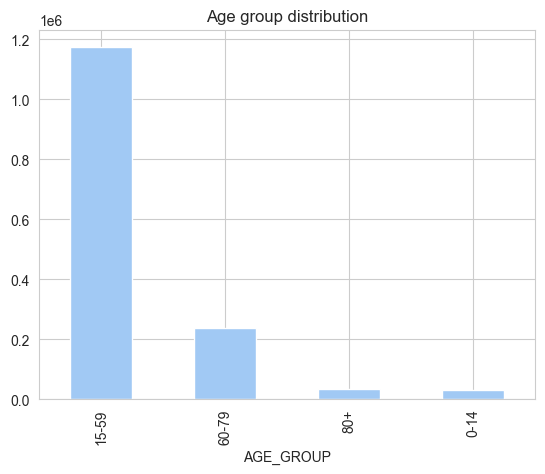

In [98]:
# Stratifying by age
age_bins = [0, 15, 60, 80, 100]
age_labels = ["0-14", "15-59", "60-79", "80+"]
data["AGE_GROUP"] = pd.cut(data["AGE"], bins=age_bins, labels=age_labels, right=False)

# Handling cases where dates are zero or missing
data["SYMPTOM_ONSET_DATE"] = pd.to_datetime(data["SYMPTOM_ONSET_DATE"], errors="coerce")
data["ADMISSION_DATE"] = pd.to_datetime(data["ADMISSION_DATE"], errors="coerce")

# Replace missing or zero dates with a placeholder (e.g., '1970-01-01')
data["SYMPTOM_ONSET_DATE"].fillna(pd.Timestamp("1970-01-01"), inplace=True)
data["ADMISSION_DATE"].fillna(pd.Timestamp("1970-01-01"), inplace=True)

# Count and plot age group distribution
data["AGE_GROUP"].value_counts()
data["AGE_GROUP"].value_counts().plot(kind="bar", title="Age group distribution")

In [99]:
data.columns

Index(['MEDICAL_UNIT_STATE', 'UPDATE_DATE', 'RECORD_ID', 'SEX', 'PATIENT_TYPE',
       'ADMISSION_DATE', 'SYMPTOM_ONSET_DATE', 'DEATH_DATE', 'INTUBATED',
       'PNEUMONIA', 'AGE', 'PREGNANCY', 'DIABETES', 'COPD', 'ASTHMA',
       'IMMUNOSUPPRESSED', 'HYPERTENSION', 'OTHER_COMORBIDITY',
       'CARDIOVASCULAR_DISEASE', 'OBESITY', 'CHRONIC_KIDNEY_DISEASE',
       'SMOKING', 'FINAL_CLASSIFICATION', 'ICU', 'FEMALE', 'MALE',
       'HOSPITALIZED', 'AMBULATORY', 'AGE_GROUP'],
      dtype='object')

In [102]:
#getting a count of symptoms and cases reported per date per age group
data["SYMPTOM_ONSET_DATE"] = pd.to_datetime(data["SYMPTOM_ONSET_DATE"], format="%Y-%m-%d", errors="coerce")
data["ADMISSION_DATE"] = pd.to_datetime(data["ADMISSION_DATE"], format="%Y-%m-%d", errors="coerce")

# Grouping by age group and date, and counting cases
result = data.groupby(["AGE_GROUP", "SYMPTOM_ONSET_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="onset")
result = result.rename(columns={"SYMPTOM_ONSET_DATE": "date"})

reported = data.groupby(["AGE_GROUP", "ADMISSION_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="reported")
reported = reported.rename(columns={"ADMISSION_DATE": "date"})

# Merging the two dataframes
final_df = pd.merge(result, reported, on=["AGE_GROUP", "date", "MEDICAL_UNIT_STATE"], how="outer")

final_df



/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_13810/869895443.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(["AGE_GROUP", "SYMPTOM_ONSET_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="onset")
/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_13810/869895443.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reported = data.groupby(["AGE_GROUP", "ADMISSION_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="reported")


,AGE_GROUP,date,MEDICAL_UNIT_STATE,onset,reported
0,0-14,2020-02-19,1,0.0,NaN
1,0-14,2020-02-19,2,0.0,NaN
2,0-14,2020-02-19,3,0.0,NaN
3,0-14,2020-02-19,4,0.0,NaN
4,0-14,2020-02-19,5,0.0,NaN
...,...,...,...,...,...
45819,80+,2021-09-06,28,NaN,0.0
45820,80+,2021-09-06,29,NaN,0.0
45821,80+,2021-09-06,30,NaN,0.0
45822,80+,2021-09-06,31,NaN,0.0


In [103]:
final_df.describe()

,date,MEDICAL_UNIT_STATE,onset,reported
count,45824,45824.000000,40192.000000,44800.000000
mean,2020-08-19 12:28:09.385474816,16.500000,36.808768,33.022723
min,2020-02-19 00:00:00,1.000000,0.000000,0.000000
25%,2020-05-21 00:00:00,8.750000,1.000000,0.000000
50%,2020-08-18 12:00:00,16.500000,4.000000,3.000000
75%,2020-11-16 00:00:00,24.250000,25.000000,19.000000
max,2021-09-06 00:00:00,32.000000,4150.000000,5120.000000
std,NaN,9.233193,134.864930,136.519848


In [104]:
final_df.rename(columns={"onset": "onsets", "AGE_GROUP": "age_group", "MEDICAL_UNIT_STATE": "state"}, inplace=True)

In [105]:
final_df["age_group"].value_counts()

age_group
0-14     11456
15-59    11456
60-79    11456
80+      11456
Name: count, dtype: int64

In [106]:
final_df

,age_group,date,state,onsets,reported
0,0-14,2020-02-19,1,0.0,NaN
1,0-14,2020-02-19,2,0.0,NaN
2,0-14,2020-02-19,3,0.0,NaN
3,0-14,2020-02-19,4,0.0,NaN
4,0-14,2020-02-19,5,0.0,NaN
...,...,...,...,...,...
45819,80+,2021-09-06,28,NaN,0.0
45820,80+,2021-09-06,29,NaN,0.0
45821,80+,2021-09-06,30,NaN,0.0
45822,80+,2021-09-06,31,NaN,0.0


In [107]:
#set missing values to 0
final_df["reported"] = final_df["reported"].fillna(0)
final_df["onsets"] = final_df["onsets"].fillna(0)

In [ ]:
final_df.to_csv("./data/state_data.csv", index=False)

In [3]:
final_df = pd.read_csv("./data/state_data.csv")

In [5]:
test = final_df[final_df["date"] < "2021-01-25"]

In [64]:
test.to_csv("./data/age_group_data.csv", index=False)

In [117]:
test[test["state"] == 19].to_csv("./data/age_group_data_mty.csv", index=False)
test[test["state"] == 14].to_csv("./data/age_group_data_jal.csv", index=False)
test[test["state"] == 9].to_csv("./data/age_group_data_mx.csv", index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


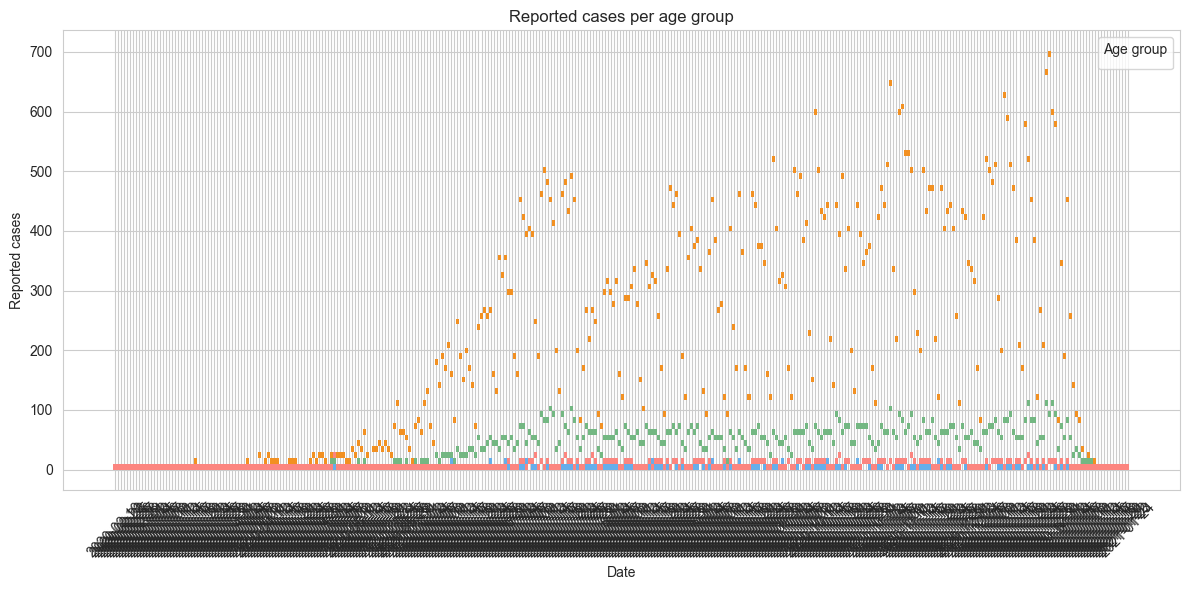

In [9]:
casos_mty = test[test["state"] == 19]
## plot cases per age group
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.histplot(data=casos_mty, x="date", y="reported", hue="age_group")
plt.title("Reported cases per age group")
plt.xlabel("Date")
plt.ylabel("Reported cases")
plt.xticks(rotation=45)
plt.legend(title="Age group")
plt.tight_layout()

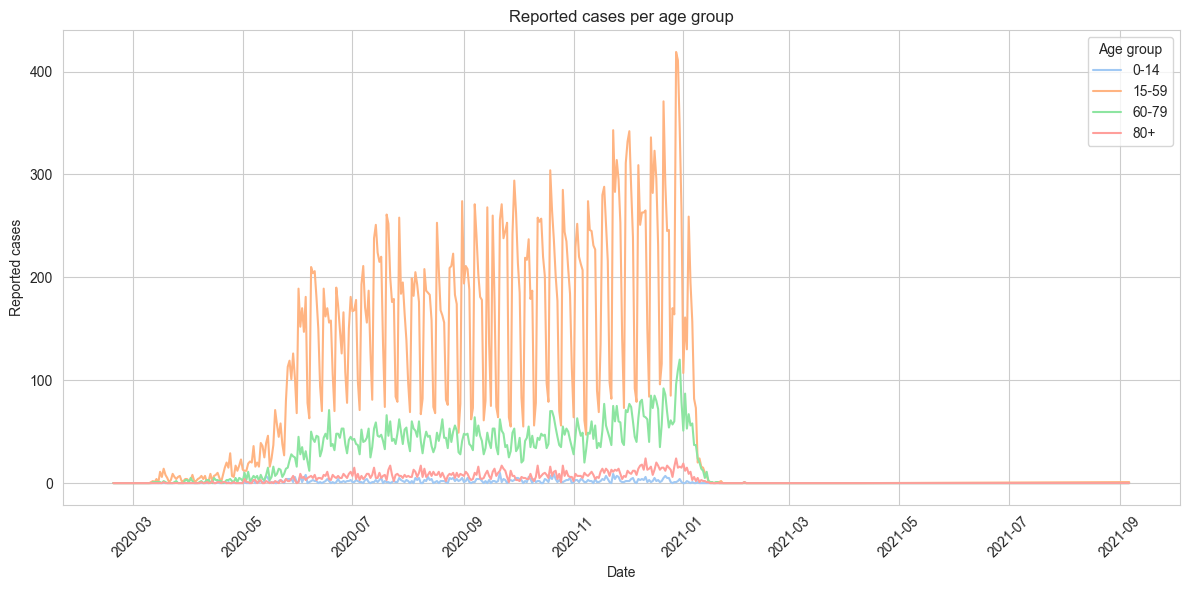

In [110]:
casos_jal = final_df[final_df["state"] == 14]
## plot cases per age group
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.lineplot(data=casos_jal, x="date", y="reported", hue="age_group")
plt.title("Reported cases per age group")
plt.xlabel("Date")
plt.ylabel("Reported cases")
plt.xticks(rotation=45)
plt.legend(title="Age group")
plt.tight_layout()

In [2]:
casos_cdmx = final_df[final_df["state"] == 9]
## plot cases per age group
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.histplot(data=casos_cdmx, x="date", y="reported", hue="age_group")
plt.title("Reported cases per age group")
plt.xlabel("Date")
plt.ylabel("Reported cases")
plt.xticks(rotation=45)
plt.legend(title="Age group")
plt.tight_layout()

NameError: name 'final_df' is not defined

## generating the age distribution file



In [11]:
final_df = pd.read_csv("./data/state_data.csv")
final_df.head()

,age_group,date,state,onsets,reported
0,0-14,2020-02-19,1,0.0,0.0
1,0-14,2020-02-19,2,0.0,0.0
2,0-14,2020-02-19,3,0.0,0.0
3,0-14,2020-02-19,4,0.0,0.0
4,0-14,2020-02-19,5,0.0,0.0


In [ ]:
final_df.groupby

,age_group,date,onsets,reported
0,0-14,2020-02-19,0.0,0.0
1,0-14,2020-02-22,0.0,0.0
2,0-14,2020-02-23,0.0,0.0
3,0-14,2020-02-25,0.0,0.0
4,0-14,2020-02-26,0.0,0.0


In [1]:
import pandas as pd

data = pd.read_csv("./data/age_group_data.csv")

In [2]:
data_mty = pd.read_csv("./data/age_group_data_mty.csv")

In [5]:
data.head()

,age_group,date,onsets,reported
0,0-14,2020-02-19,0.0,0.0
1,0-14,2020-02-22,0.0,0.0
2,0-14,2020-02-23,0.0,0.0
3,0-14,2020-02-25,0.0,0.0
4,0-14,2020-02-26,0.0,0.0


In [6]:
data_mty.head()

,age_group,date,state,onsets,reported
0,0-14,2020-02-19,19,0.0,0.0
1,0-14,2020-02-22,19,0.0,0.0
2,0-14,2020-02-23,19,0.0,0.0
3,0-14,2020-02-25,19,0.0,0.0
4,0-14,2020-02-26,19,0.0,0.0


In [16]:
data_age = pd.read_csv("./data/age_group_data.csv")
(data_age[data_age["age_group"] == "80+"]["date"].value_counts() >1).sum

<bound method Series.sum of date
2020-02-19    False
2020-10-01    False
2020-10-09    False
2020-10-08    False
2020-10-07    False
              ...  
2020-06-12    False
2020-06-11    False
2020-06-10    False
2020-06-09    False
2021-01-24    False
Name: count, Length: 338, dtype: bool>

In [12]:
data_age[data_age["age_group"] == "0-14"]["reported"].sum()

31393.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


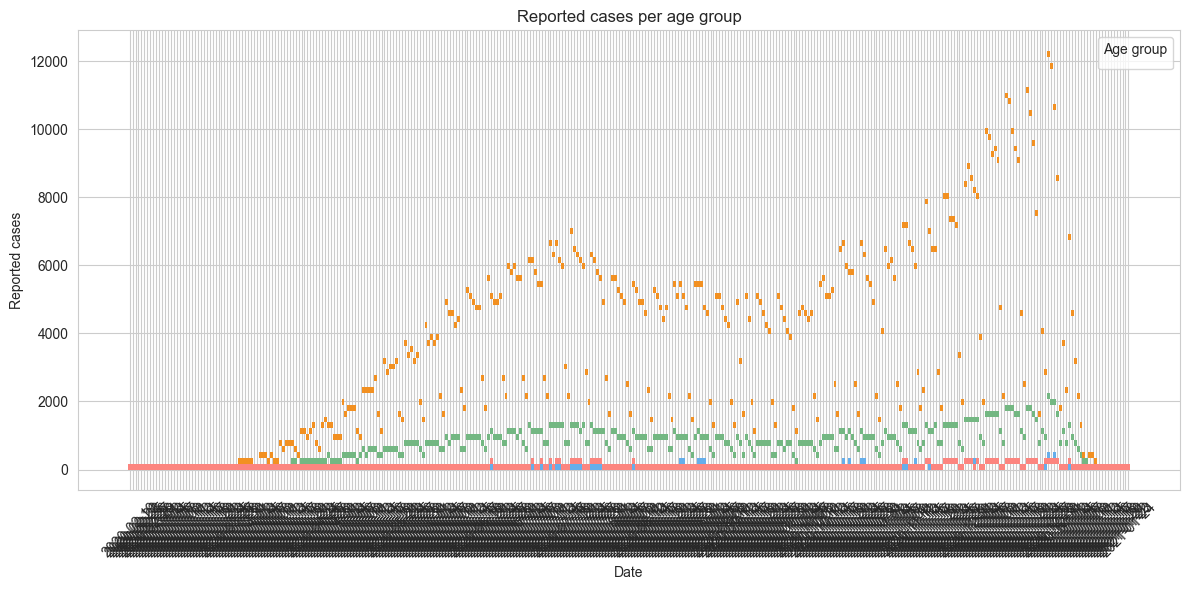

In [13]:
#plot data age thorugh time
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 
sns.set_palette("pastel")
sns.histplot(data=data_age, x="date", y="reported", hue="age_group")
plt.title("Reported cases per age group")
plt.xlabel("Date")
plt.ylabel("Reported cases")
plt.xticks(rotation=45)
plt.legend(title="Age group")
plt.tight_layout()